<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/ANN-project/blob/main/Nhandien3nguoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [56]:
#get data
with open('data.pickle', 'rb') as f:
  (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre = x_train[40]
x_pre1 = x_train[1]
x_pre2 = x_train[70]
x_train = x_train[:299] 
y_train = y_train[:299]
y_train


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [57]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 3)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

x_train[0]

array([0.13725491, 0.1882353 , 0.1882353 , ..., 0.62352943, 0.6313726 ,
       0.6       ], dtype=float32)

In [58]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (67500,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(3, activation='sigmoid'))



In [59]:
model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

Epoch 1/50
3/3 [==============================] - 1s 116ms/step - loss: 3.7988 - acc: 0.4177 - val_loss: 2.4835 - val_acc: 0.3000
Epoch 2/50
3/3 [==============================] - 0s 48ms/step - loss: 1.9076 - acc: 0.4177 - val_loss: 1.5727 - val_acc: 0.3000
Epoch 3/50
3/3 [==============================] - 0s 45ms/step - loss: 1.3116 - acc: 0.5949 - val_loss: 1.0898 - val_acc: 0.7000
Epoch 4/50
3/3 [==============================] - 0s 44ms/step - loss: 1.0453 - acc: 0.6456 - val_loss: 0.8057 - val_acc: 0.4000
Epoch 5/50
3/3 [==============================] - 0s 53ms/step - loss: 0.8375 - acc: 0.3924 - val_loss: 0.6275 - val_acc: 0.7000
Epoch 6/50
3/3 [==============================] - 0s 44ms/step - loss: 0.6293 - acc: 0.6962 - val_loss: 0.4438 - val_acc: 0.7000
Epoch 7/50
3/3 [==============================] - 0s 47ms/step - loss: 0.4147 - acc: 0.6962 - val_loss: 0.3750 - val_acc: 0.7000
Epoch 8/50
3/3 [==============================] - 0s 46ms/step - loss: 0.3043 - acc: 0.6962 - va

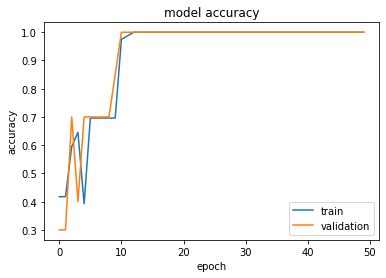

In [64]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

In [60]:
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255
img1 = x_pre1.reshape(1,-1)
img1 = img1.astype('float32')
img1 /= 255
img2 = x_pre2.reshape(1,-1)
img2 = img2.astype('float32')
img2 /= 255

1
Day la Nhat


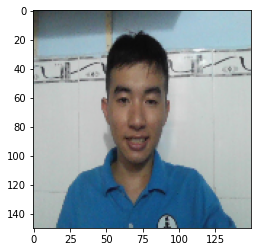

In [61]:
#nhận dạng
k = np.argmax(model.predict(img))
print(k)
if k == 0:
  print('Day la Luu')
if k == 1:
 print('Day la Nhat')
if k == 2:
  print('Day la Quan')


plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

0
Day la Luu


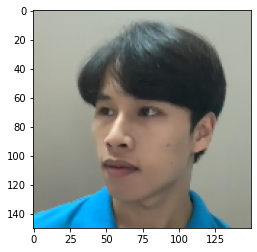

In [62]:
k1 = np.argmax(model.predict(img1))
print(k1)
if k1 == 0:
  print('Day la Luu')
if k1 == 1:
 print('Day la Nhat')
if k1 == 2:
  print('Day la Quan')


plt.imshow(cv2.cvtColor(x_pre1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

2
Day la Quan


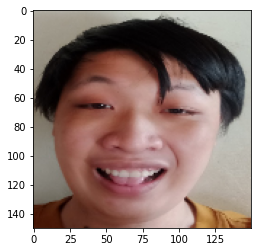

In [63]:
k2 = np.argmax(model.predict(img2))
print(k2)
if k2 ==0:
  print('Day la Luu')
if k2 == 1:
 print('Day la Nhat')
if k2 == 2:
  print('Day la Quan')


plt.imshow(cv2.cvtColor(x_pre2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))